## Vector Operations

Working with geospatial vector data typically involves manipulating collections of features - points, lines and polygons with attributes. The basic steps are the same as you would use with any type of data: load the vector data as input, do some kind of work on the data, output the data. This lab will focus on step two, do some kind of work on the data, specifically looking at some analysis that can be done with vector data.

There are many operations that geopanda has made easy for you. This lab will cover some of them. Refer to [geopanda documentation](http://geopandas.org/geometric_manipulations.html) to see a complete list of the operations included with geopanda. 

Lets get started by loading some data. The data for this practice will be NYC borough shape files:
 * [NYC Borough Boundaries](https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=Shapefile) - See it in action [here](https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm)
 * [NYC Wi-Fi Hotspot Locations](https://data.cityofnewyork.us/api/geospatial/a9we-mtpn?method=export&format=Shapefile) - See it in action [here](https://data.cityofnewyork.us/Social-Services/NYC-Wi-Fi-Hotspot-Locations/a9we-mtpn)
 

In [17]:
import os
import pandas as pd
import numpy as np
from shapely.geometry import Point
from random import randint, uniform
import matplotlib.pyplot as plt

import urllib.request
import shutil
from pathlib import Path
from zipfile import ZipFile

import geopandas as gpd

In [2]:
# Designate the URL for a file
file_URL = 'https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=Shapefile'

# Designate the local filename
local_file_name = 'nyc_boroughs.zip'

# Designate the local file name with a path to a temp directory.
     # Your Repo comes with this folder.  If not, use terminal and 
     # navigate to course folder > module3 and them : mkdir temp
file_Path = Path('../temp/')  
file_Path /= local_file_name

# Download the file from `url` and save it locally under `file_Path`:
with urllib.request.urlopen(file_URL) as response,  file_Path.open(mode='w+b') as out_file:
    shutil.copyfileobj(response, out_file)

# unzip file
to_unzip = ZipFile('../temp/nyc_boroughs.zip', 'r')
unzipped = '../temp/nyc_boroughs_unzipped'
to_unzip.extractall(unzipped)
to_unzip.close()
for file in os.listdir(unzipped):
    if file.endswith(".shp"):
        shape_file =  unzipped + '/' + file

In [3]:
# Read data into GeoDataFrame and view data
NYC = gpd.GeoDataFrame.from_file(shape_file)
NYC.head()

,boro_code,boro_name,geometry,shape_area,shape_leng
0,5.0,Staten Island,(POLYGON ((-74.05050806403247 40.5664220341608...,1.623914e+09,330434.340939
1,1.0,Manhattan,(POLYGON ((-74.01092841268031 40.6844914725429...,6.366004e+08,361657.416718
2,3.0,Brooklyn,(POLYGON ((-73.86706149472118 40.5820879767934...,1.937596e+09,741150.814455
3,4.0,Queens,(POLYGON ((-73.83668274106707 40.5949466970158...,3.044780e+09,895729.259626
4,2.0,Bronx,(POLYGON ((-73.89680883223774 40.7958084451597...,1.186619e+09,463454.790585


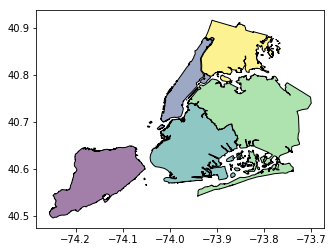

In [5]:
# plot the data
NYC.plot()    

In [31]:
# Designate the URL for a file
file_URL = 'https://data.cityofnewyork.us/api/geospatial/a9we-mtpn?method=export&format=Shapefile'

# Designate the local filename
local_file_name = 'nyc_wifi.zip'

# Designate the local file name with a path to a temp directory.
     # Your Repo comes with this folder.  If not, use terminal and 
     # navigate to course folder > module3 and them : mkdir temp
file_Path = Path('../temp/')  
file_Path /= local_file_name

# Download the file from `url` and save it locally under `file_Path`:
with urllib.request.urlopen(file_URL) as response,  file_Path.open(mode='w+b') as out_file:
    shutil.copyfileobj(response, out_file)

# unzip file
to_unzip = ZipFile('../temp/nyc_wifi.zip', 'r')
unzipped = os.getcwd() + '/nyc_wifi_unzipped'
to_unzip.extractall(unzipped)
to_unzip.close()
for file in os.listdir(unzipped):
    if file.endswith(".shp"):
        shape_file =  unzipped + '/' + file

# Read data into GeoDataFrame and view data
NYC_wifi = gpd.GeoDataFrame.from_file(shape_file)
NYC_wifi.head()

,bbl,bin,boro,borocd,borocode,boroct2010,boroname,city,coundist,ct2010,...,objectid,postcode,provider,remarks,sourceid,ssid,time_activ,type,x,y
0,0.000000e+00,0.0,MN,105.0,1.0,1009500.0,Manhattan,New York,3.0,95.0,...,998.0,10001.0,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-008695,LinkNYC Free Wi-Fi,00:00:00.000,Free,985901.695307,211053.130644
1,1.008590e+09,1016929.0,MN,105.0,1.0,1007400.0,Manhattan,New York,2.0,74.0,...,999.0,10016.0,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-014013,LinkNYC Free Wi-Fi,00:00:00.000,Free,988387.309473,210559.946684
2,1.010160e+09,1024714.0,MN,105.0,1.0,1011900.0,Manhattan,New York,3.0,119.0,...,1000.0,10036.0,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-007083,LinkNYC Free Wi-Fi,00:00:00.000,Free,988162.256449,215315.021263
3,1.010200e+09,1076195.0,MN,105.0,1.0,1012500.0,Manhattan,New York,4.0,125.0,...,1001.0,10036.0,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-003309,LinkNYC Free Wi-Fi,00:00:00.000,Free,988587.757617,216155.033448
4,1.010208e+09,1087187.0,MN,105.0,1.0,1012500.0,Manhattan,New York,4.0,125.0,...,1002.0,10019.0,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-000162,LinkNYC Free Wi-Fi,00:00:00.000,Free,988532.655360,216316.036881


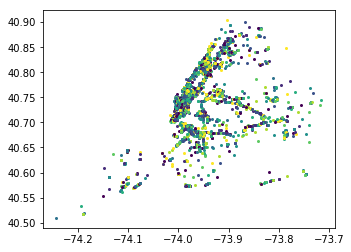

In [35]:
# plot the data
NYC_wifi.plot()  

Now that we have our data loaded, lets use some GeoPanda methods to examine and manipulate the geometry.

### Convex Hulls
Sometimes it is useful to be able to determine the smallest area that completely encloses a polygon, which is what convex hulls is. The following command will return a GeoSeries of geometries representing the smallest convex Polygon containing all the points in each object unless the number of points in the object is less than three. For two points, the convex hull collapses to a LineString; for 1, a Point.

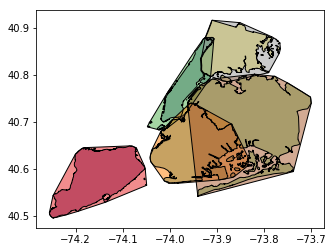

In [50]:
# create convex hulls
hulls = NYC['geometry'].convex_hull

# plot overlay
hulls.plot(ax=NYC.plot())

### Envelope
instead of the smallest of any shape, sometimes it is very useful to have the the smallest rectangular polygon (with sides parallel to the coordinate axes) that contains each object. This is known as envelope, minimum bounding rectangle (MBR), or simply bounding box. The following command will return a GeoSeries of geometries representing the point or smallest rectangular polygon (with sides parallel to the coordinate axes) that contains each object.

        minx       miny       maxx       maxy
0 -74.255591  40.496115 -74.049236  40.648926
1 -74.047730  40.682917 -73.906651  40.879038
2 -74.041896  40.569530 -73.833559  40.739128
3 -73.962620  40.541834 -73.700009  40.801011
4 -73.933606  40.785357 -73.765332  40.915533


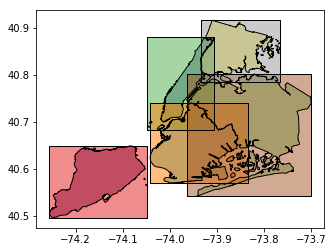

In [7]:
# create envelopes
envelope = gpd.GeoSeries(hulls.envelope)

# plot overlay
envelope.plot(ax=NYC.plot())

# you can also calculate the bounding boxes for each borough this way
boundingboxes = NYC['geometry'].bounds

print(boundingboxes)

## Centroid
Sometimes it is useful to summarize a polygon into a single point and, for that, a good candidate is its centroid (almost like a spatial analogue of the average). The following command will return a GeoSeries (a single column with spatial data) with the centroids of a polygon GeoDataFrame

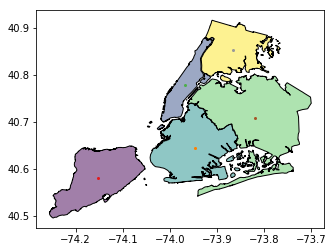

In [8]:
centriod = gpd.GeoSeries(NYC.centroid)
centriod.plot(ax=NYC.plot())

## Point in polygon (PiP)
Knowing whether a point is inside a polygon is conceptually a simple exercise but computationally a tricky task to perform. The simplest way to perform this operation in GeoPandas is through the contains method, available for each polygon object.

In [9]:
Bronx = NYC[NYC['boro_name'] == 'Bronx']
Bronx.contains(centriod[1])

4    False
dtype: bool

In [13]:
Bronx.contains(centriod[4])

4    True
dtype: bool

Performing point-in-polygon in this way is great to show the concept of point in poly, but for cases with many points and polygons, it is not particularly efficient. In these situations, it is much more advisable to perform then as a "spatial join". We will learn about these next week. 

## Buffers
Buffers are one of the classical GIS operations in which an area is drawn around a particular geometry, given a specific radious. These are very useful, for instance, in combination with point-in-polygon operations to calculate accessibility, catchment areas, etc.

To create a buffer using geopandas, simply call the buffer method, passing in the radius. Note that the radius needs to be specified in the same units as the CRS of the geography you are working with. 

In [32]:
NYC_wifi.crs

{'init': 'epsg:4326'}

This tells us it uses projection 4326 in the EPSG system. If we [look it up](http://epsg.io/4326), we will find that this corresponds with the World Geodetic System 1984 (GPS), which is expressed in degrees. Hence if we want, for example, a buffer of 2 degrees around each of the wifi points, we can simply obtain it by:

In [33]:
buffer = NYC_wifi.buffer(.005)
buf.head()

0    POLYGON ((-73.74278330298024 38.56205100620519...
1    POLYGON ((-73.57444988010309 38.7344422722038,...
2    POLYGON ((-73.47661466435748 38.62076116225862...
3    POLYGON ((-75.94178607134054 41.00563378233385...
4    POLYGON ((-75.93123568747095 40.76787748607295...
dtype: object

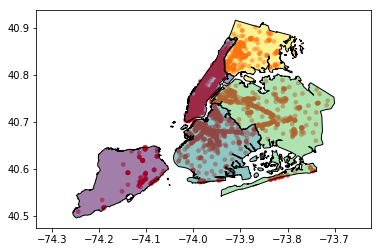

In [34]:
f, ax = plt.subplots(1)
# Plot buffer
for poly in buffer:
    gpd.plotting.plot_multipolygon(ax, poly, linewidth=0)
# Plot borough on top for reference
NYC.plot(ax=ax)
plt.axis('equal')
plt.show()

## Area
Area is also very useful to know in regards to the data. Lets take a breif look at the area of the Bronx, according to wikipedia the area of land in the bronx is 110 Square Kilometers. Lets see how we can calculate this. 

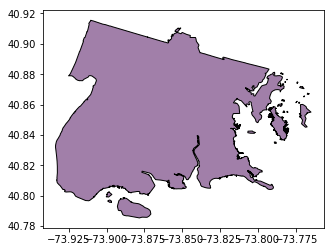

In [51]:
Bronx = NYC[NYC['boro_name'] == 'Bronx']
Bronx.plot()

Once again we need to check our CRS to determine units.  

In [39]:
Bronx.crs

{'init': 'epsg:2831'}

Just like the NYC_wifi the projection is [4326](http://epsg.io/2831), which means it is current units are degrees. Lets change to a projection that has units in meters.


In [38]:
Bronx = Bronx.to_crs({'init': 'epsg:2831'})

In [49]:
area = (Bronx['geometry'].area / 1000000).iloc[0]

print(area)

110.241056331


Refer to [geopanda documentation](http://geopandas.org/geometric_manipulations.html) to see more operations that can be done. 

# Save your notebook

## The File > Save and Halt